# Predicting The Age of Abalones
## Phase 2: Statistical Modelling

#### Group Name: Group32

#### Name(s) & ID(s) of Group Members:
Ahmed Shams Saif - s3961227\
Vadhthanak Vibol - S3951117\
Tanvir Rahman Taiyeb - s3965287\
Jake O'Brien - s3896637\
Mahfuzul Hasan - s3956803
#### 

## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

We sought to finish Data Preparation and Visualisation of the "Abalone" during Phase 1 of this project, where roughly 9 characteristics and 4178 observations were evaluated. Gender, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, rings were the explanatory variables used to explain the target feature of the study, which was the age of how old an abalone is. Twenty rows from the dataset are shown. We used the one hot code encoding method for gender to make it numerical, along with conventional prediction models, such as multiple linear regression, by making assumptions, such as that the rows in the dataset were not related.

Several data cleaning and preprocessing processes were carried out in Phase 1, including:

**Examining missing values**: After verifying, there wasn't any missing data.

**Identifying characteristics' numerical and categorical values for errors**: Checking for values that are erroneous by definition was part of this. This analysis revealed that certain columns, including Gender, Length, Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight, and Rings, had outliers.

**Identifying outliers and deleting them**:A look for outliers was done on each of the aforementioned characteristics, and any that were found were eliminated.

**Aggregation**: This phase comprised encoding the classified columns such as name, data type, units and description. Integer encoding was finished since all variables were ordinals.

**Renaming columns**: Complex or non descriptive column names were changed.

**Random Sampling**: Due to the size of the dataset, 5000 random rows were chosen at random.

After preprocessing, data analysis and visualisation were accomplished using a combination of multivariable, two-variable, and three-variable plots. These plots assisted in examining how different descriptive characteristics affected how old an Abalone is. A variety of graphs, including scatter plots, box plots, and histograms, were used in the visualisations. It was found that the most typical height of an abalone is about 0.2 millimeters, and the typical age of an abalone is between 10 and 15 years. The male abalone is the most prevalent of all, while the female is the least prevalent, according to the data..Thus, the overarching goal of the data analysis for Phase 1 is to provide knowledge for future generations on how various abalone traits might aid in determining age.


### Report Overview

The dataset is about the Age of abalone and contains information about gender, length, diameter, height, whole weight, shucked weight, Viscera weight, shell weight and number of rings. These features seem sufficient for an attempt for a predictive modelling of the age of abalone depending on their physical characteristics. The data set has 9 features (physical characteristics) and 4178 observations (measurements). 

Our target feature is Age, which is a continuous numerical feature. Hence, our project is on a regression problem. Full models and model fitting will be used to help visualise the direct linear regression that can be seen from all variables of interest within our dataset. Once regression models are plotted they are then put through diagnostic checks to ensure that the model adequately relates to the target feature. 

Furthermore we will explore the limitations of the data and its variability throughout the predictive modelling process. Following is a conclusion and summary of our findings from the regression analysis.

### Overview of Methodology

In this case study here we will learn more about the age of abalones by modeling our way through. In doing so, it will help us achieve our potential in predicting the ages of abalones by using modeling to compare the predicted ages and the actual ages. After this, we can use linear regression to map out the fitted line for each graphs, telling us how the ages of the abalone would progress in the future.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

Let's begin by importing each of the models required for this report.

#### Module Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('abalone_cleaned_phase2.csv')

Using all of the available features, we first fit a multiple linear regression that forecasts `age`. This is the full model. Let's first quickly glance at the clean data.

In [5]:
df.head()

,Unnamed: 0,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Gender_F,Gender_I,Gender_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


The data includes an extra index column called `Unnamed: 0` that is not necessary. Let's drop it.

In [6]:
df = df.drop(columns=['Unnamed: 0'])

Now, we can manually include each independent feature in the regression formula. However, if there are many independent variables, we can get clever and employ some string function hacks, as shown below.

First, since there are spaces in the names of the models, let's rename the columns to remove all spaces. This will stop an error from occuring when we use the formula to create the model.

To obtain an accurate R-square value, we must also remove the `Rings` column because it is directly related to `Age`. 

`Age` = `Rings` + 1.5

In [7]:
df = df.rename(columns = {'Whole weight': 'Whole_weight'})
df = df.rename(columns = {'Shucked weight': 'Shucked_weight'})
df = df.rename(columns = {'Shell weight': 'Shell_weight'})
df = df.rename(columns = {'Viscera weight': 'Viscera_weight'})
df = df.drop(columns=['Rings'])

df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [8]:
# Regression Formula shortcut
formula_string_indep_vars = ' + '.join(df.drop(columns='Age').columns)
formula_string = 'Age ~ ' + formula_string_indep_vars
print('Regression Formula: ', formula_string)

Regression Formula:  Age ~ Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight + Gender_F + Gender_I + Gender_M


We now fit an OLS (ordinary least squares) model to our encoded data since we have defined our statistical model formula as a Python string.

In [9]:
model_full = sm.formula.ols(formula=formula_string, data=df)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:16:23   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8542      0.207     18.

Only 53.8% of the variance is explained by the full model, which has an adjusted R-squared value of 0.538. The majority of the p-values are highly significant, except for length which has a p-value of 0.08.

Let's create a new data frame that compares the residuals from the complete model and the actual age to the predicted age. This data frame will be used to plot both the regression residuals and the predicted values.

In [10]:
residuals_full = pd.DataFrame({'actual': df['Age'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,16.5,10.722306,5.777694
1,8.5,9.349257,-0.849257
2,10.5,12.595570,-2.095570
3,11.5,11.154205,0.345795
4,8.5,8.235447,0.264553
5,9.5,9.313695,0.186305
6,21.5,15.038510,6.461490
7,17.5,12.963648,4.536352
8,10.5,11.218703,-0.718703
9,20.5,14.634920,5.865080


Let's compare the actual and predicted ages on a graph.

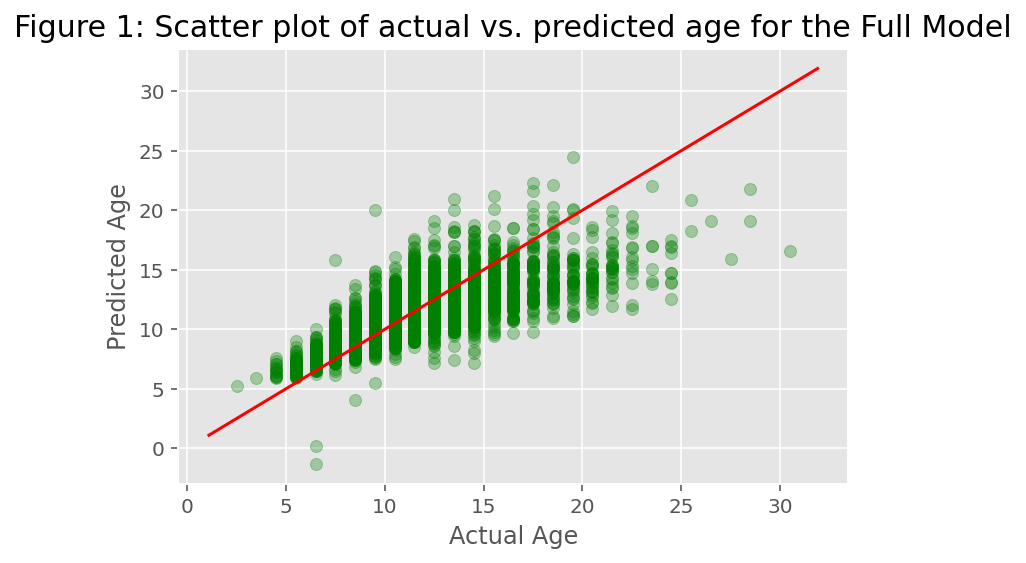

In [11]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, color='green');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Age');
plt.ylabel('Predicted Age');
plt.title('Figure 1: Scatter plot of actual vs. predicted age for the Full Model', fontsize=15);
plt.show();

In [12]:
df['Age'].max()

30.5

Despite the oldest abalone in the dataset being 30.5 years old, Figure 1 shows that the model can never predict values higher than 25.

We will now examine the full model's diagnostics.

### Full Model Diagnostic Checks

We want to see if there are any signs of regression assumptions being violated, which are

1. The target variable and independent variables must have a linear relationship.
2. Constant Variance of the errors
3. The residual distribution's normality
4. The residuals' statistical independence

First, let's create a scatter plot of the residuals (based on the predicted `Age`).

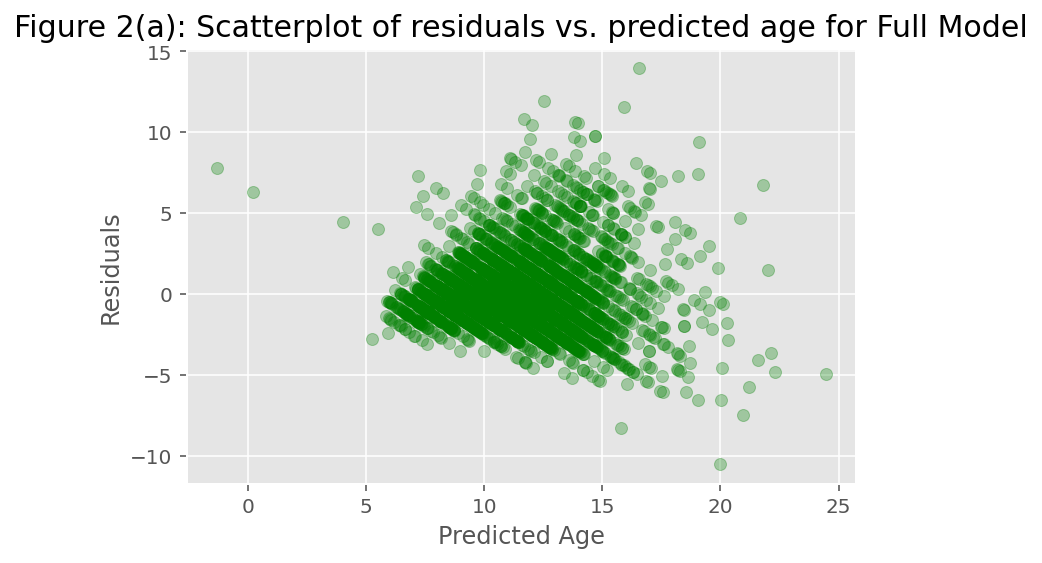

In [13]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3, color='green');
plt.xlabel('Predicted Age');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted age for Full Model', fontsize=15)
plt.show();

**From Figure 2(a), we see that, rather than being mostly random and centered around 0, when the age is around from 10-15 it seems that the residuals are grouped together. This model here cannot satisfy our linear regression.

Now let's plot the actual `Age` versus the residuals.

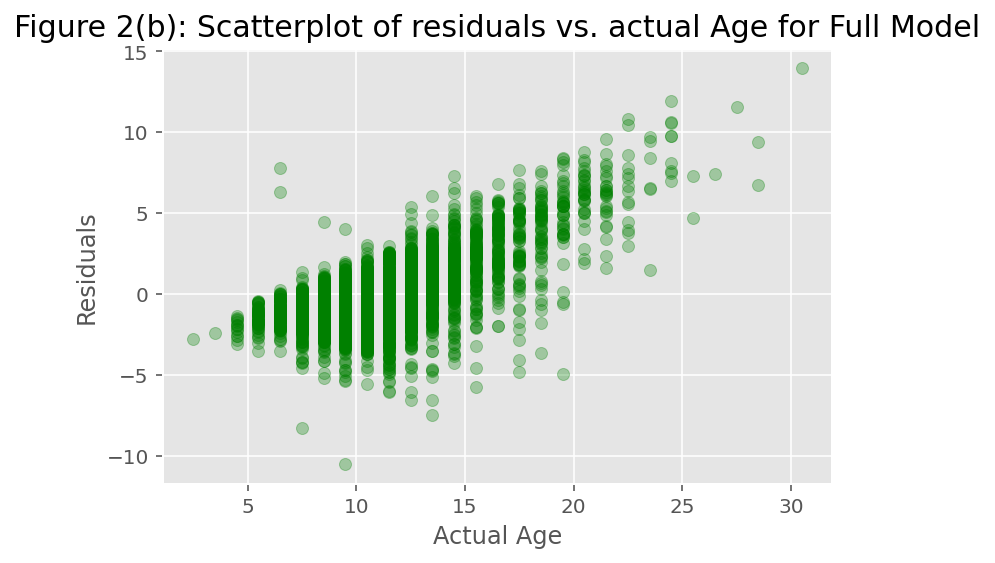

In [14]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3, color='green');
plt.xlabel('Actual Age');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual Age for Full Model', fontsize=15)
plt.show();

**From Figiure 2(b): Looking at this figure, the model predicts that younger ages are more common than the older ages. Even looking at the older ages such as 25 - 30, it estimates the ages to significantly younger ages.

On the same plot, let's superimpose the histograms of Actual Age and Predicted Age.

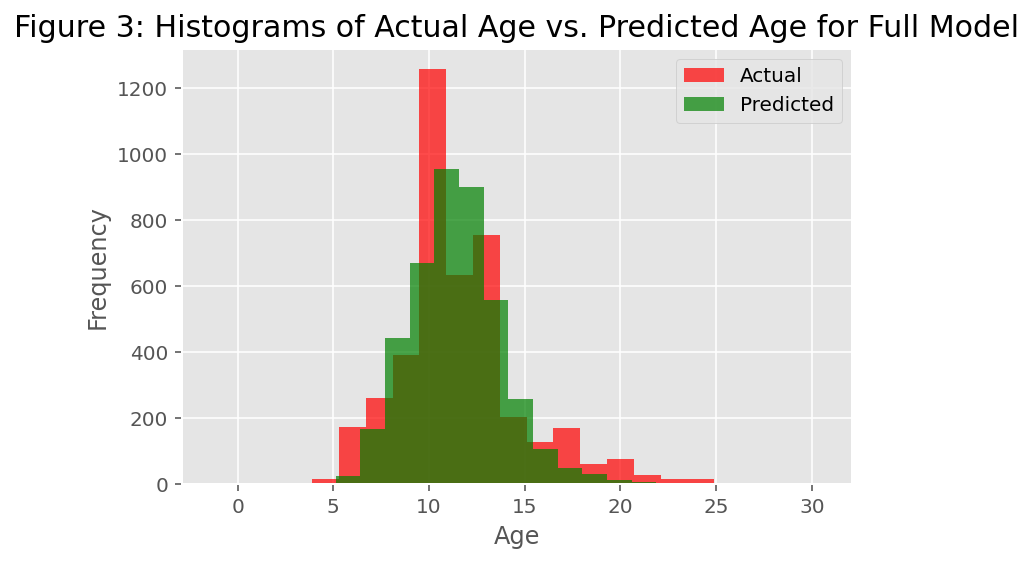

In [15]:
plt.hist(residuals_full['actual'], label='Actual', bins=20, alpha=0.7, color='red');
plt.hist(residuals_full['predicted'], label='Predicted', bins=20, alpha=0.7, color='green');
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of Actual Age vs. Predicted Age for Full Model', fontsize=15);
plt.legend()
plt.show();

**Figure 3: The prediction model's predicted age and the actual age seems to be similar to one another, other than the frequency. The frequency of the predicted age is a lot lower than the actual age at the 10-15 age rating.

Now let's look at the residuals histogram.

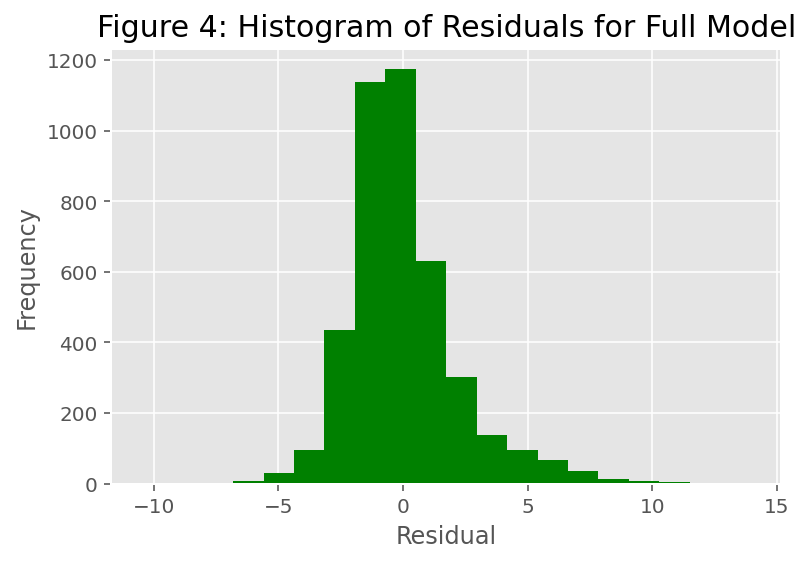

In [16]:
plt.hist(residuals_full['residual'], bins = 20, color='green');
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of Residuals for Full Model', fontsize=15);
plt.show();

**Figure 4: This figure here looks to be a symmetrical graph while looking like it slightly is turning into a right-skewed graph. This graph also shows that line will not violate the linear regression.

### Feature Selection

The features that do not benefit our model or do not allow us to draw any conclusions about how the age of abalone varies must now be eliminated. To achieve this, we will use backwards feature selection, which verifies the p values of each variable, eliminates any that are greater than 0.05 one at a time, and then re-fits the model.

Code from the sample provided from the github account, which is the regression case study on predicting age in census, is used in the section that follows ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [17]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    # print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Length" with p-value 0.8

***
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     606.4
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:16:25   Log-Likelihood:                -9204.2
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4168   BIC:                         1.848e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [22]:
model_reduced_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     606.4
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:17:08   Log-Likelihood:                -9204.2
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4168   BIC:                         1.848e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8356      0.193     19.825      0.000       3.456       4.215
Diameter          10.5695      0.989     10.688      0.000       8.631      12.508
Height            10.7491      1.535      7.002      0.000       7.739      13.759
Whole_weight       8.9775      0.725     12.378      0.000       7.556      10.399
Shucked_weight   -19.8026      0.815    -24.301      0.000     -21.400     -18.205
Viscera_weight   -10.6128      1.288     -8.241      0.000     -13.138      -8.088
Shell_weight       8.7508      1.124      7.785      0.000       6.547      10.955
Gender_F           1.5348      0.093     16.535      0.000       1.353       1.717
Gender_I           0.7084      0.074      9.629      0.000       0.564       0.853
Gender_M           1.5924      0.085     18.652      0.000       1.425       1.760
==============================================================================
Omnibus:                      948.188   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.822
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       6.164   Cond. No.                     1.40e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Reduced Model Overview

Let's create a new data frame for Actual Age vs. Predicted Age and the Residuals for the reduced model, just as we did for the full model.

In [23]:
residuals_reduced = pd.DataFrame({'actual': df['Age'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,16.5,10.716457,5.783543
1,8.5,9.348181,-0.848181
2,10.5,12.595069,-2.095069
3,11.5,11.140896,0.359104
4,8.5,8.229240,0.270760
5,9.5,9.326991,0.173009
6,21.5,15.041942,6.458058
7,17.5,12.967419,4.532581
8,10.5,11.219014,-0.719014
9,20.5,14.633518,5.866482


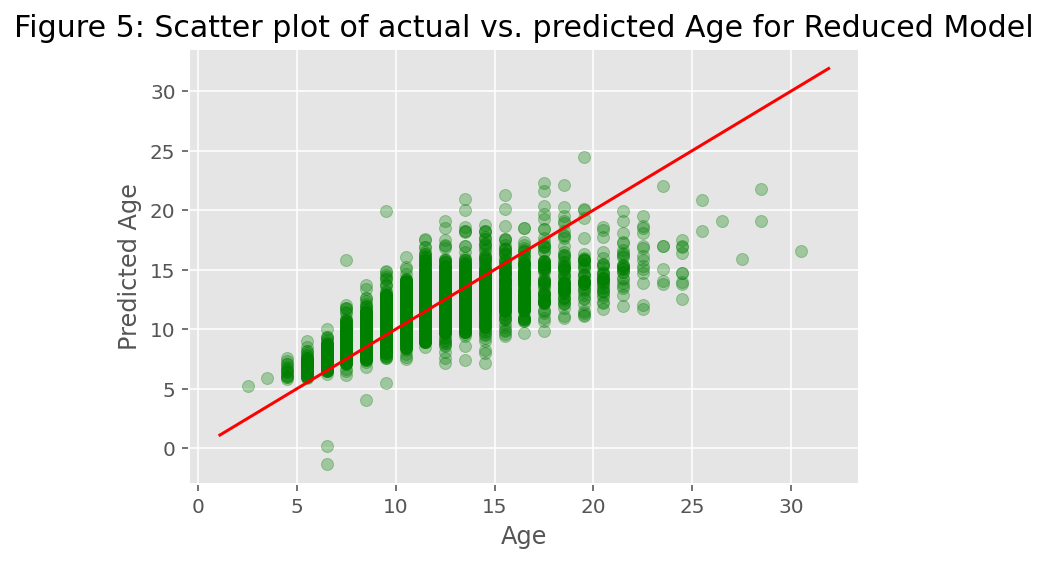

In [24]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3, color='green');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Age');
plt.ylabel('Predicted Age');
plt.title('Figure 5: Scatter plot of actual vs. predicted Age for Reduced Model', fontsize=15);
plt.show(); 

**Figure 5: This model returns an Adjusted R-squared of 0.537, meaning the reduced model still explains about 53.7% of the variance. Looking at the p-values, they are all significant at the 5% level, as expected. From Figure 5, we still have the same issues with our model. That is, the model overestimates younger ages and underestimates older ages. We will now perform the diagnostic checks on this reduced model.

### Reduced Model Diagnostic Checks

First, let's create a scatter plot of the residuals (based on the predicted age).

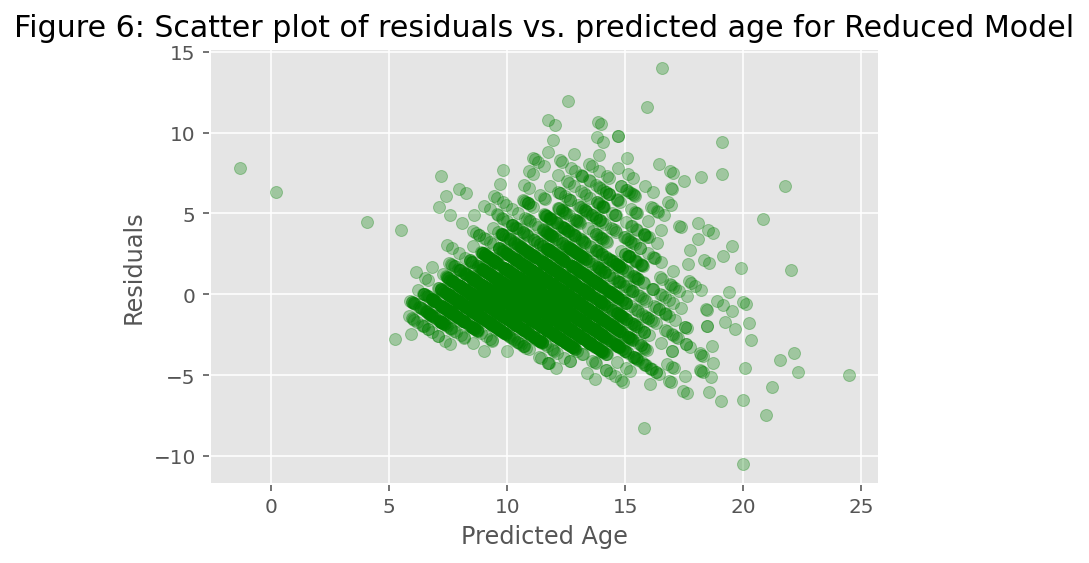

In [20]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3, color='green');
plt.xlabel('Predicted Age');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter plot of residuals vs. predicted age for Reduced Model', fontsize=15)
plt.show();

The residuals seem to follow the same pattern as Figures 6 and 2(a), respectively.

Let's now examine the residuals histogram for the reduced model.

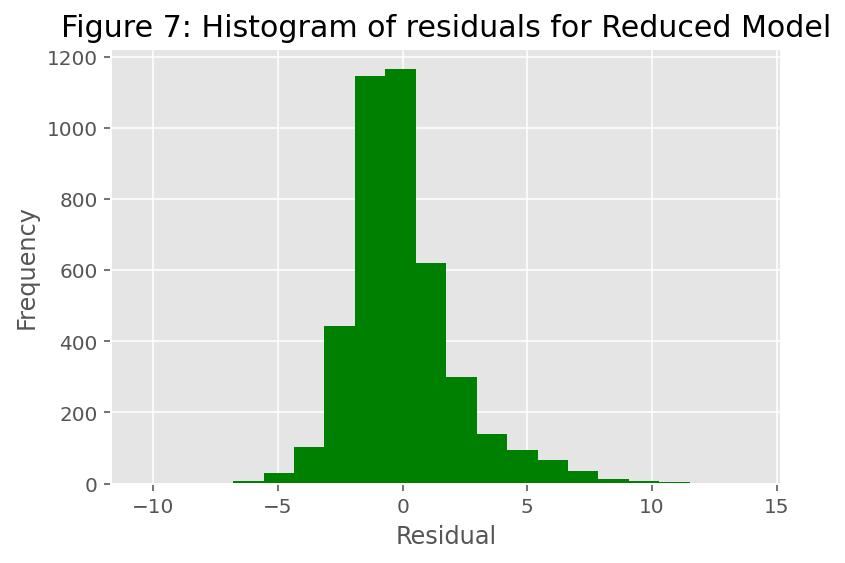

In [21]:
plt.hist(residuals_reduced['residual'], bins = 20, color='green');
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

**From Figure 7, there is again a somewhat symmetric histogram around zero, which tells us that the residuals are similarly distributed along the graph.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach:

The strengths that we found is that the predicted age of abalone increases at a small rate throughout the data, making it very easy to apply it into a regression model. Furthermore from this steady rise the linear nature of the data is visible from the graph as the line of best fit highlights this relationship.  

The problem with the data set that we encountered is how the predicted age is lower than the actual age by a huge amount, making it quite confusing to us researchers. But using this prediction, it can tell that most abalones don’t live for longer than 20 years. 


## Summary & Conclusions <a id='sc'></a>

### Summary of Findings

The dataset, which is about the age of abalone, provides data on the gender, size, height, weight, number of rings, viscera, and whole and shucked weights.By using this case study as an example, we may gain more knowledge on the age of abalones. By comparing the anticipated ages and the actual ages using modelling, this will enable us to forecast the ages of abalones as accurately as possible. After that, we can use linear regression to map out the fitted line for each graph, which will show us how the abalone's ages will develop over time. We first fit a multiple linear regression that anticipates age using all of the
relevant data. The entire model is shown here. Peruse the clean data for a moment.Unnamed: 0, a supplemental index column that is not required, is present in the data.Each independent feature must now be individually included to the regression equation. If there are several independent variables, though, we may be crafty and use some string function hacks, as seen below. We exclude the Rings column because it is closely connected to Age in order to get an appropriate R-square value.The whole model, which has an adjusted R-squared value of 0.538, explains just 53.8% of the variation. As can be observed by looking at the p-values, the bulk of the p-values are highly significant, although there are a few insignificant factors at a 5% level.Let's generate a fresh data frame and compare the residuals from the full model as well as the difference between the actual and anticipated ages. Both the predicted values and the regression residuals will be shown using this data frame.If there are any indications that the regression assumptions, which includes:

    - Linear relation between the target and independent variable    
    - Various errors
    - Statistical independence of the residuals. (Figure-1)
    
**From Figure 2(a):**
We see that the residuals appear to be clustered when the age is between 10 and 15 years old, rather than being primarily random and centred around 0. We are unable to use this model to fit our linear regression.

**From Figure 2(b):**
The model suggests that younger ages are more prevalent than older ages when looking at this figure. Even when looking at later ages like 25 to 30, it projects the ages to be much younger. Let's superimpose the histograms for Actual Age and Predicted Age on the same plot.

**From Figure 3:**
Except for frequency, there appears to be some correlation between the anticipated age by the prediction model and the actual age. The anticipated age at the 10-15 age rating occurs far less frequently than the actual age.

**From Figure 4:**
This graph appears to be symmetrical while yet having a little tendency to skew to the right. Additionally, this graph demonstrates that the line will not deviate from linear regression. It is now necessary to remove any features that do not support our model or do not permit us to derive any conclusions about how the age of abalone varies. Backwards feature selection, which evaluates the p values of each variable, eliminates any that are greater than 0.05 one at a time, and then re-fits the model, will be used to do this.

**From Figure 5:**
This model yields an Adjusted R-squared of 0.537, which indicates that the simplified model still accounts for around 53% of the variance. According to the p-values, all of the results are significant at the 5% level. We can see from Figure 5 that our model still has the same problems. To put it another way, the model overestimates younger years and underestimates older ages. On this simplified model, we will now run the diagnostic tests.

**Figure 6 and Figure 2(a)** follows the same pattern.Then in Figure 7,a symmetric
histogram around 0,which indicates that the residuals are distributing similarly
in the graph.



### Project Summary & Conclusions

In Phase 2, we talked about predicting the age of each abalone by looking at the actual age and the predicted age of each abalone. To do this we will need to use code to find the fitted model of the abalone's age and this will give us the residual and the predicted age. By doing this we can find each different plots for the scatter graphs for both the predicted and the actual plot. This enables us to find the linear regression for the graphs by adding fitted lines and predict how the age would change and how abalones will age in time

According to the gender of the abalone, the scatter plot shows their height and length. This graph reveals that the male and female abalones are fairly closely packed and are not spread very widely.As we can see, in general, the newborn abalones have substantially lower viscera and shell weights compared to fully matured male and female abalones. The line plot shows the viscera weight vs. the shell weight depending on the gender.Thus, the overarching goal of the data analysis for Phase 1 is to provide knowledge for future generations on how various abalone traits might aid in determining age. As a result, the main objective of Phase 1's data analysis is to teach future generations about how numerous abalone features may help determine age.

### References

- Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) "The Population Biology of Abalone (Haliotis species) in Tasmania. I. Blacklip Abalone (H. rubra) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

- (Akman, n.d.)
Akman, D. (n.d.). Regression_case_study_predicting_age_in_census_data.Ipynb at main · akmand/stats_tutorials.